<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221116.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterator

In [1]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import seaborn as sns 
import matplotlib.pyplot as plt 
from datetime import datetime, date, time, timezone, timedelta 
import os
import re

from functools import reduce
from collections import defaultdict 

import prophet as pr

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'online_retail_II.xlsx',
 '1_order_payments_dataset.csv',
 'sales_vs_discount.csv',
 'ecommerce-data.csv',
 'online_retail.xlsx',
 'scanner_data.csv',
 'match_result_test.csv',
 'test.csv',
 'sample-sales-data.csv',
 'mall_customers.csv',
 'bz_data_analyis.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_orders_dataset.csv',
 '1_customers_dataset.csv',
 'mock_sales_data.csv',
 'groceries.csv',
 'sales.csv',
 'sales_data_with_stores.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sample_data']

In [6]:
df = pd.read_csv('KPMG_VI_New_raw_data_update_final.csv')
df = df[df.order_status == 'Approved']
df['ds'] = pd.to_datetime(df.transaction_date, infer_datetime_format=True)
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,ds
0,1,2,2950,25-02-2017,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25
1,2,3,3120,21-05-2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21
2,3,37,402,16-10-2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16
3,4,88,3135,31-08-2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31
4,5,78,787,01-10-2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01


In [8]:
df['brand'].value_counts()

Solex             4211
Giant Bicycles    3283
WeareA2B          3265
OHM Cycles        3016
Trek Bicycles     2965
Norco Bicycles    2885
Name: brand, dtype: int64

In [10]:
cnt = df.groupby(['ds','brand'])['list_price'].sum().reset_index().rename(columns = {'list_price':'y'})
cnt.head()

,ds,brand,y
0,2017-01-01,Giant Bicycles,8580.99
1,2017-01-01,Norco Bicycles,2890.69
2,2017-01-01,OHM Cycles,10078.17
3,2017-01-01,Solex,13783.22
4,2017-01-01,Trek Bicycles,5287.26


In [22]:
def get_oracle(df) :

  list_brand = df['brand'].unique()

  res = list()

  for work in list_brand :
    temp = df[df['brand'] == work].drop(['brand'], axis = 1)
    m = pr.Prophet().fit(temp)
    future = m.make_future_dataframe(periods = 14)
    forecast = m.predict(future)

    vision = forecast[['ds', 'yhat', 'trend']]
    vision.insert(0, 'brand', work)
    vision = pd.merge(vision, temp, 'left', 'ds')

    res.append(vision)
  
  res = pd.concat(res).reset_index().drop('index', axis = 1)
  
  return res

In [23]:
res = get_oracle(cnt)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz95v9pt7/5ani0bc8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz95v9pt7/b5f1txsy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89097', 'data', 'file=/tmp/tmpz95v9pt7/5ani0bc8.json', 'init=/tmp/tmpz95v9pt7/b5f1txsy.json', 'output', 'file=/tmp/tmpz95v9pt7/prophet_model_ocojy6j/prophet_model-20221115234532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:45:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:45:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality

In [24]:
res.head()

,brand,ds,yhat,trend,y
0,Giant Bicycles,2017-01-01,10495.514983,10549.655626,8580.99
1,Giant Bicycles,2017-01-02,10439.987614,10552.871499,10350.79
2,Giant Bicycles,2017-01-03,11005.442228,10556.087372,21249.41
3,Giant Bicycles,2017-01-04,11288.649167,10559.303244,13665.40
4,Giant Bicycles,2017-01-05,10068.682671,10562.519117,9497.01


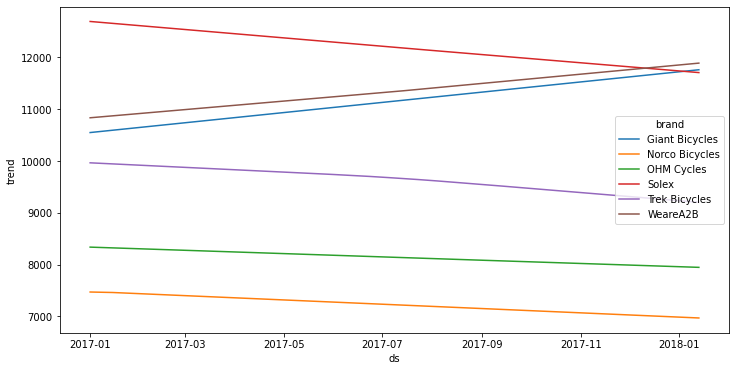

In [26]:
plt.figure(figsize = (12 , 6))
sns.lineplot(data = res, x = 'ds', y = 'trend', hue = 'brand')


# Iterator

In [27]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [30]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}